In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns

In [2]:
# Import dataset
vgreviews_df = pd.read_csv('Resources/result.csv')
vgreviews_df

,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,8.3,"Sep 17, 2013"
1,97,Grand Theft Auto V,X360,8.3,"Sep 17, 2013"
2,95,The Last of Us,PS3,9.2,"Jun 14, 2013"
3,94,BioShock Infinite,PS3,8.5,"Mar 26, 2013"
4,94,BioShock Infinite,PC,8.6,"Mar 25, 2013"
...,...,...,...,...,...
15642,38,Touhou Kobuto V: Burst Battle,Switch,4.6,"Oct 10, 2017"
15643,38,Randall,PS4,2.1,"Jun 6, 2017"
15644,36,Tokyo Tattoo Girls,VITA,5.4,"Nov 14, 2017"
15645,26,Road Rage,PS4,2.5,"Nov 14, 2017"


In [3]:
vgreviews_df.drop(['console', 'date'], axis=1, inplace=True)

In [4]:
vgreviews_df = vgreviews_df[vgreviews_df.userscore != 'tbd']

In [5]:
vgreviews_df.isnull().sum()

metascore    0
name         0
userscore    0
dtype: int64

In [6]:
vgreviews_df.dtypes

metascore     int64
name         object
userscore    object
dtype: object

In [7]:
vgreviews_df = vgreviews_df.astype({'userscore': float})

In [8]:
vgreviews_df.dtypes

metascore      int64
name          object
userscore    float64
dtype: object

In [9]:
vgreviews_df['userscore'] = vgreviews_df['userscore'] * 10


In [10]:
vgreviews_df

,metascore,name,userscore
0,97,Grand Theft Auto V,83.0
1,97,Grand Theft Auto V,83.0
2,95,The Last of Us,92.0
3,94,BioShock Infinite,85.0
4,94,BioShock Infinite,86.0
...,...,...,...
15642,38,Touhou Kobuto V: Burst Battle,46.0
15643,38,Randall,21.0
15644,36,Tokyo Tattoo Girls,54.0
15645,26,Road Rage,25.0


In [11]:
vgreviews_df['userscore'] = vgreviews_df['userscore'].astype(int).replace('\.0', '', regex=True)

In [12]:
vgreviews_df

,metascore,name,userscore
0,97,Grand Theft Auto V,83
1,97,Grand Theft Auto V,83
2,95,The Last of Us,92
3,94,BioShock Infinite,85
4,94,BioShock Infinite,86
...,...,...,...
15642,38,Touhou Kobuto V: Burst Battle,46
15643,38,Randall,21
15644,36,Tokyo Tattoo Girls,54
15645,26,Road Rage,25


In [13]:
vgreviews_df.isnull().sum()

metascore    0
name         0
userscore    0
dtype: int64

In [14]:
# print(f"Duplicate entries: {vgreviews_df.duplicated().sum()}")

In [15]:
# vgreviews_df = vgreviews_df.drop_duplicates(subset=['name'])

In [16]:
# print(f"Duplicate entries: {vgreviews_df.duplicated().sum()}")

In [17]:
vgreviews_df.describe()

,metascore,userscore
count,14274.000000,14274.000000
mean,70.758232,70.287165
std,12.615941,13.604362
min,11.000000,2.000000
25%,64.000000,64.000000
50%,73.000000,73.000000
75%,80.000000,80.000000
max,98.000000,94.000000


In [18]:
vgreviews_df['metascore'].value_counts()

77    521
80    519
73    511
75    508
72    498
     ... 
19      2
21      1
16      1
11      1
18      1
Name: metascore, Length: 84, dtype: int64

In [19]:
vgreviews_df['userscore'].value_counts()

77    699
76    600
75    588
73    537
80    500
     ... 
5       2
2       1
7       1
8       1
94      1
Name: userscore, Length: 91, dtype: int64

<AxesSubplot:xlabel='userscore'>

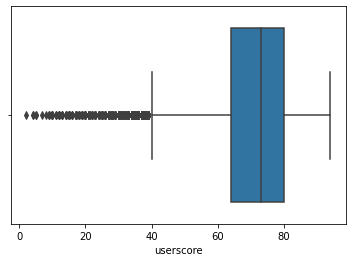

In [20]:
# Boxplots to look at outliers with clean data
sns.boxplot(x=vgreviews_df['userscore'])

<AxesSubplot:xlabel='metascore'>

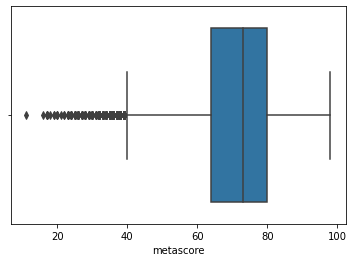

In [21]:
sns.boxplot(x=vgreviews_df['metascore'])

In [22]:
vgreviews_df

,metascore,name,userscore
0,97,Grand Theft Auto V,83
1,97,Grand Theft Auto V,83
2,95,The Last of Us,92
3,94,BioShock Infinite,85
4,94,BioShock Infinite,86
...,...,...,...
15642,38,Touhou Kobuto V: Burst Battle,46
15643,38,Randall,21
15644,36,Tokyo Tattoo Girls,54
15645,26,Road Rage,25


In [23]:
vgreviews_df.to_csv('Resources/Video_Games.csv', index=False)